
Étapes de Construction d'un Blockmodel

Construction de la Matrice d'Adjacence : Représenter le réseau initial avec une matrice d'adjacence, où chaque cellule indique la présence ou l'absence d'une connexion entre deux nœuds.


In [1]:
import numpy as np

# Exemple de matrice d'adjacence pour un réseau simple
adj_matrix = np.array([
    [0, 1, 1, 0, 0],
    [1, 0, 1, 1, 0],
    [1, 1, 0, 0, 1],
    [0, 1, 0, 0, 1],
    [0, 0, 1, 1, 0]
])




2. Clustering des Nœuds : Appliquer un algorithme de clustering pour regrouper les nœuds en blocs. Par exemple, l'algorithme de Concor peut être utilisé pour cette étape.


In [2]:
from sklearn.cluster import AgglomerativeClustering

# Appliquer un clustering hiérarchique
clustering = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
clusters = clustering.fit_predict(adj_matrix)

# Affichage des clusters
print(f"Clusters des nœuds : {clusters}")


Clusters des nœuds : [0 1 0 0 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scipy/cluster/hierarchy.py:833: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')



3.Construction de la Matrice de Bloc : Calculer la matrice de bloc en regroupant les nœuds selon leurs clusters et en calculant les relations moyennes entre les blocs.


In [3]:
def create_blockmodel(adj_matrix, clusters):
    n_blocks = len(set(clusters))
    blockmodel = np.zeros((n_blocks, n_blocks))

    for i in range(n_blocks):
        for j in range(n_blocks):
            block_i = np.where(clusters == i)[0]
            block_j = np.where(clusters == j)[0]
            sub_matrix = adj_matrix[np.ix_(block_i, block_j)]
            blockmodel[i, j] = np.mean(sub_matrix)

    return blockmodel

blockmodel = create_blockmodel(adj_matrix, clusters)
print("Matrice de bloc :")
print(blockmodel)


Matrice de bloc :
[[0.22222222 0.83333333]
 [0.83333333 0.        ]]


4. Visualisation : Visualiser la matrice de bloc pour interpréter les relations entre les blocs.

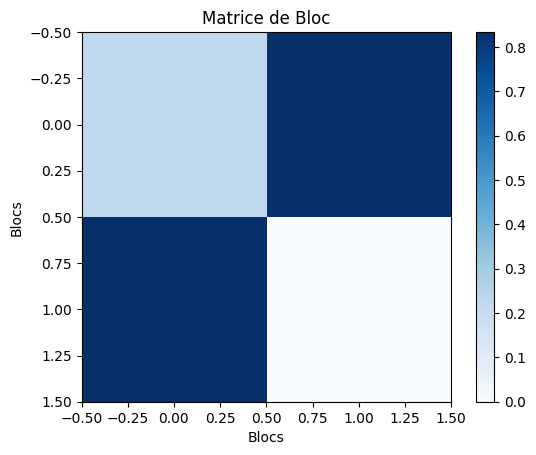

In [4]:
import matplotlib.pyplot as plt

plt.imshow(blockmodel, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.title("Matrice de Bloc")
plt.xlabel("Blocs")
plt.ylabel("Blocs")
plt.show()
